In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Information on each member on each alliance they're a member
ally_member = pd.read_csv("./COW_data/alliance_v4.1_by_member.csv")

In [3]:
ally_member.info()

ally_member.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   version4id     1221 non-null   int64  
 1   ccode          1221 non-null   int64  
 2   state_name     1221 non-null   object 
 3   all_st_day     1221 non-null   int64  
 4   all_st_month   1221 non-null   int64  
 5   all_st_year    1221 non-null   int64  
 6   all_end_day    848 non-null    float64
 7   all_end_month  848 non-null    float64
 8   all_end_year   848 non-null    float64
 9   ss_type        1221 non-null   object 
 10  mem_st_day     1221 non-null   int64  
 11  mem_st_month   1221 non-null   int64  
 12  mem_st_year    1221 non-null   int64  
 13  mem_end_day    862 non-null    float64
 14  mem_end_month  862 non-null    float64
 15  mem_end_year   862 non-null    float64
 16  left_censor    1219 non-null   float64
 17  right_censor   1221 non-null   int64  
 18  defense 

,version4id,ccode,state_name,all_st_day,all_st_month,all_st_year,all_end_day,all_end_month,all_end_year,ss_type,...,mem_end_day,mem_end_month,mem_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
0,1,200,United Kingdom,9,5,1386,NaN,NaN,NaN,Type I: Defense Pact,...,NaN,NaN,NaN,1.0,1,1,0,1.0,0.0,4.1
1,1,235,Portugal,9,5,1386,NaN,NaN,NaN,Type I: Defense Pact,...,NaN,NaN,NaN,1.0,1,1,0,1.0,0.0,4.1
2,2,200,United Kingdom,5,2,1766,15.0,2.0,1911.0,Type III: Entente,...,15.0,2.0,1911.0,1.0,0,0,0,0.0,1.0,4.1
3,2,380,Sweden,5,2,1766,15.0,2.0,1911.0,Type III: Entente,...,15.0,2.0,1911.0,1.0,0,0,0,0.0,1.0,4.1
4,3,240,Hanover,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,3.0,1848.0,0.0,0,1,0,1.0,1.0,4.1
5,3,240,Hanover,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,6.0,1866.0,0.0,0,1,0,1.0,1.0,4.1
6,3,245,Bavaria,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,3.0,1848.0,1.0,0,1,0,1.0,1.0,4.1
7,3,245,Bavaria,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,6.0,1866.0,0.0,0,1,0,1.0,1.0,4.1
8,3,255,Germany,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,3.0,1848.0,1.0,0,1,0,1.0,1.0,4.1
9,3,255,Germany,8,6,1815,15.0,6.0,1866.0,Type I: Defense Pact,...,15.0,6.0,1866.0,0.0,0,1,0,1.0,1.0,4.1


In [4]:
ally_member.tail()

,version4id,ccode,state_name,all_st_day,all_st_month,all_st_year,all_end_day,all_end_month,all_end_year,ss_type,...,mem_end_day,mem_end_month,mem_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version
1216,412,626,South Sudan,10,2,2012,27.0,3.0,2012.0,Type IIb: Non-Aggression Pact,...,27.0,3.0,2012.0,0.0,0,0,0,1.0,0.0,4.1
1217,413,651,Egypt,26,3,1979,NaN,NaN,NaN,Type IIb: Non-Aggression Pact,...,NaN,NaN,NaN,0.0,1,0,0,1.0,0.0,4.1
1218,413,666,Israel,26,3,1979,NaN,NaN,NaN,Type IIb: Non-Aggression Pact,...,NaN,NaN,NaN,0.0,1,0,0,1.0,0.0,4.1
1219,414,2,United States of America,30,11,1981,26.0,12.0,1991.0,Type III: Entente,...,26.0,12.0,1991.0,0.0,0,0,0,0.0,1.0,4.1
1220,414,666,Israel,30,11,1981,26.0,12.0,1991.0,Type III: Entente,...,26.0,12.0,1991.0,0.0,0,0,0,0.0,1.0,4.1


In [5]:
ally_member.isnull().sum()

version4id         0
ccode              0
state_name         0
all_st_day         0
all_st_month       0
all_st_year        0
all_end_day      373
all_end_month    373
all_end_year     373
ss_type            0
mem_st_day         0
mem_st_month       0
mem_st_year        0
mem_end_day      359
mem_end_month    359
mem_end_year     359
left_censor        2
right_censor       0
defense            0
neutrality         0
nonaggression      1
entente            2
version            0
dtype: int64

In [6]:
# Finding nan values for cow codes
ally_member[ally_member['ccode']== 34]

,version4id,ccode,state_name,all_st_day,all_st_month,all_st_year,all_end_day,all_end_month,all_end_year,ss_type,...,mem_end_day,mem_end_month,mem_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,version


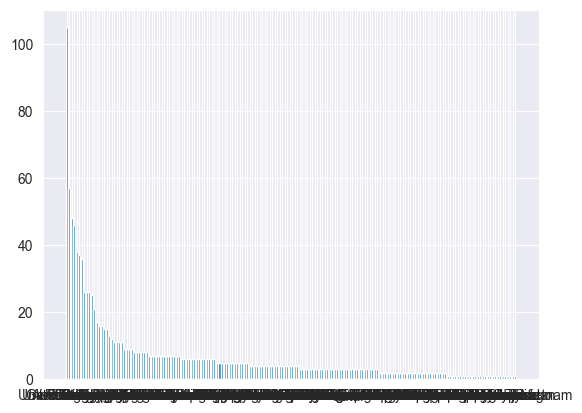

In [16]:
""" Plotting number of alliances per country """

# Number of times a state is initiated into the dataset, can repeat if they leave and rejoin an alliance
occurances = ally_member['state_name'].value_counts()
plt.bar(occurances.index, occurances)
plt.show()